![Astrofisica Computacional](../logo.PNG)

---
## 01. Physics Informed Neural Networks (PINNs)


Eduard Larrañaga (ealarranaga@unal.edu.co)

---

### Abstract

In this notebook we will present the idea of Physics Informed Neural Networks (PINNs) and implement a simple example.

---

## Ordinary Differential Equations

Consider a single ODE with the general form

<!-- Equation labels as ordinary links -->
<div id="ode"></div>

$$
\begin{equation} \label{ode} \tag{1}
f\left(x, \, y(x), \, y'(x), \, y''(x), \, \dots \, , \, y^{(n)}(x)\right) = 0,
\end{equation}
$$

where $y(x)$ is the function to find, and $y^{(n)}(x)$ is the $n$-th derivative of $y(x)$. The highest order of derivative, $n$, determines to the order of the equation.

Along with ([1](#ode)), wed need some additional conditions for the function $y(x)$ (initial or boundary conditions) for the solution to be unique.

## The Trial Solution

We will consider a trial solution $y_t(x)$,

<!-- Equation labels as ordinary links -->
<div id="_auto1"></div>

$$
\begin{equation}
	y_t(x) = h_0(x) + h_1(x,N(x,P)),
\label{_auto1} \tag{2}
\end{equation}
$$

where $h_0(x)$ is a function that makes $y_t(x)$ satisfy a given set
of (initial or boundary) conditions, $N(x,P)$ a neural network with weights and biases
described by $P$ and $h_1(x, N(x,P))$ is some expression involving the
neural network.  

The role of the function $h_1(x, N(x,P))$, is to
ensure that the output from $N(x,P)$ is zero when $y_t(x)$ is
evaluated at the values of $x$ where the given conditions must be
satisfied.  The function $h_0(x)$ should alone make $y_t(x)$ satisfy
those conditions.


An optimization method will be used to optimize the values of the parameters of the neural network, weights and biases, through backward propagation.

## Optimization process

In order to perform the optimization process, we need to define a cost function to minimize.

Due to the ODE, $f\left(x, \, y(x), \, y'(x), \, y''(x), \, \dots \, , \, y^{(n)}(x)\right)$ should be equal to zero in ([1](#ode)). Hence, we can choose the mean squared error as the cost function, $C\left(x, P \right)$, for an input $x$,

$$
C\left(x, P\right) = \big(f\left(x, \, y(x), \, y'(x), \, y''(x), \, \dots \, , \, y^{(n)}(x)\right)\big)^2.
$$

When we consider a number $N$ of inputs, given as a vector $\boldsymbol{x}$ with elements $x_i$ for $i = 1,\dots,N$, the cost function will be defined as the sum

<!-- Equation labels as ordinary links -->
<div id="cost"></div>
$$
\begin{equation} \label{cost} \tag{3}
	C\left(\boldsymbol{x}, P\right) = \frac{1}{N} \sum_{i=1}^N \big(f\left(x_i, \, g(x_i), \, g'(x_i), \, g''(x_i), \, \dots \, , \, g^{(n)}(x_i)\right)\big)^2.
\end{equation}
$$

The central idea of the PINN will be to find the parameters $P$ that minimizes the cost function in ([3](#cost)) for a set of $N$ training points (samples) $x_i$.

### Optimization of the cost function using gradient descent and automatic differentiation

The optimization procedure will need the gradient of $C\left(\boldsymbol{x}, P\right)$  w.r.t. the parameters $P$. Sometimes, the analytical expression for the gradient of the cost function may be very complicated. However, there are some libraries that calculates the derivatives numerically with very high precision.

---

## Example: Exponential decay

An exponential decay of a physical quantity $y(x)$ is described by the ODE

<!-- Equation labels as ordinary links -->
<div id="solve_expdec"></div>
$$
\begin{equation} \label{solve_expdec} \tag{4}
  y'(x) = -\gamma y(x),
\end{equation}
$$

together with the initial condition $y(0) = y_0$, with $y_0$ a constant. In this example we will consider the values $\gamma = 2$ and $g_0 = 10$.

It is well known that the analytical solution of the initial value problem in ([4](#solve_expdec)) is

<!-- Equation labels as ordinary links -->
<div id="_auto2"></div>
$$
\begin{equation}
  y(x) = y_0 \exp\left(-\gamma x\right).
\label{_auto2} \tag{5}
\end{equation}
$$

Since we know the analytical solution, it is possible to use it to compare with the result of the neural network's solution.

### Setup of the Neural Network  and the trial solution

We will create a neural network with the following structure:

- an input layer with $N_{\text{in}}$ (no weights and no bias to optimize)
- a hidden layer with $N_{\text{hid} }$ neurons and $P^{\text{hid}}$ parameters to optimize
- an output layer with $N_{\text{out} }$ neurons and $P^{\text{out}}$ parameters to optimize. 


Hence, we will have  a set of parameters  $P = \{ P^{\text{hid}},  P^{\text{out}} \}$ that will be optimized.

#### Parameters in the hidden layer 
In general, when having $N_{\text{in}}$ neurons in the input layer and $N_{\text{hid} }$ neurons in the hidden layer, we have that $P^{\text{hid}}$ is a $\left[ N_{\text{hid} } \times (1 + N_{\text{in}}) \right]$ matrix.

In this particular example, the unknown function has one variable, $y(x)$, and therefore we need just **one neuron in the input layer**, i.e. $N_{\text{in}} = 1$. Hence, in this particular case we have that $P^{\text{hid}}$ is a $\left[ N_{\text{hid} } \times 2 \right]$ matrix. The first column in $P^{\text{hid} }$ represents the bias for each neuron in the hidden layer, the second column represents the weights for each neuron in the hidden layer. This matrix looks as follows

\begin{equation}
P^{\text{hid}} = 
\begin{pmatrix}
b^{\text{hid}}_1 & w^{\text{hid}}_{1} \\
b^{\text{hid}}_2 & w^{\text{hid}}_{2} \\
\vdots & \vdots  \\
b^{\text{hid}}_{N_{hid}} & w^{\text{hid}}_{N_{hid}} 
\end{pmatrix}. \tag{6a}
\end{equation}

#### Parameters in the output layer 
Since there are $N_{\text{out} }$ neurons in the output layer, we have that $P^{\text{out}} $ is a $\left[ N_{\text{out} } \times (1 + N_{\text{hid} })\right]$ matrix. 

In this particular example, the output is one number and therefore we need just one neuron in the output layer, $N_{\text{out}=1$. This implies that $P^{\text{out}} $ is a $\left[ 1 \times (1 + N_{\text{hid} })\right]$ matrix. In this matrix, the first column represents the only bias present and the remaining columns give the weights to each signal coming from the hidden layer,

\begin{equation}
P_{\text{out}} = 
\begin{pmatrix}
b^{\text{out}} & w^{\text{out}}_{1} & w^{\text{out}}_{2} & \cdots & w^{\text{out}}_{N_{hid}}
\end{pmatrix}. \tag{6b}
\end{equation}

#### The trial solution
Now we turn our attention to the trial solution $y_t(t)$, which is written as

$$
y_t(x, P) = h_0(x) + h_1(x, N(x, P)).
$$


Since the initial condition states that $y(0) = y_0$, we need that $y_t(0, P) = y_0$. This is acomplished by choosing $h_0(x) = y_0$ and $h_1(x, N(x,P)) = x \cdot N(x,P)$. Then, we get

<!-- Equation labels as ordinary links -->
<div id="trial"></div>

$$
\begin{equation} \label{trial} \tag{7}
y_t(x, P) = y_0 + x \cdot N(x, P).
\end{equation}
$$

### The Cost Function

The trial solution has been chosen such that it already solves the initial condition $y(0) = y_0$. Now, the neural network must find the set of weights and biases $P$ such that the trial solution in ([7](#trial)) satisfies the ODE ([4](#solve_expdec)), i.e. such that

<!-- Equation labels as ordinary links -->
<div id="nnmin"></div>

$$
\begin{equation} \label{nnmin} \tag{8}
y_t'(x, P) = - \gamma y_t(x, P)
\end{equation}
$$

is fulfilled as *best as possible*. Therefore, we define the cost function for an input value $x$ as

\begin{equation}
C(x,P) = \big(y_t'(x, P) - ( -\gamma y_t(x, P) \big)^2
\end{equation}

or, in terms of weights and biases for the hidden and output layer in our network,

\begin{equation}
C(x, \{ P_{\text{hid} }, P_{\text{out} }\}) = \big(y_t'(x, \{ P_{\text{hid} }, P_{\text{out} }\}) - ( -\gamma y_t(x, \{ P_{\text{hid} }, P_{\text{out} }\}) \big)^2.
\end{equation}


If the neural network evaluates $y_t(x, P)$ at more values for $x$, say $N$ values $x_i$ for $i = 1, \dots, N$, then the *total* cost function to minimize becomes

<!-- Equation labels as ordinary links -->
<div id="min"></div>

$$
\begin{equation} \label{min} \tag{9}
C(\boldsymbol{x}, \{ P_{\text{hid} }, P_{\text{out} }\}) = \frac{1}{N} \sum_{i=1}^N  \big(y_t'(x_i, \{ P_{\text{hid} }, P_{\text{out} }\}) - ( -\gamma y_t(x_i, \{ P_{\text{hid} }, P_{\text{out} }\}) \big)^2 
\end{equation}.
$$


## Implementation of the Neural Network (NN)

For simplicity, it is assumed that the input is an array $\boldsymbol{x} = (x_1, \dots, x_N)$ with $N$ elements. It is at these points that the neural network should find $P$ such that it fulfills ([9](#min)).

#### The Input Layer

The first step in the NN is to feed forward the inputs. This means that $\boldsymbol{x}$ must be passed (component by component) through the input layer, then to the hidden layer and finally to the output layer. An important fact is that the input layer does not process the data. It will consist of $N_{\text{in}}=1$ neuron that pass the input to each neuron in the hidden layer.

#### The Hidden Layer

The action of the hidden layer must be such that, for the $i$-th neuron in the hidden layer with bias $b_i^{\text{hid} }$ and weight $w_{i}^{\text{hid} }$, the weighting for the $j$-th component of the input vector is

$$
\begin{aligned}
z_{i,j}^{\text{hid}} &= b_i^{\text{hid}} + w_{i}^{\text{hid}}x_j\\
&=
\begin{pmatrix}
b_i^{\text{hid}} & w_i^{\text{hid}}
\end{pmatrix}
\begin{pmatrix}
1 \\
x_j
\end{pmatrix}.
\end{aligned}
$$





on the input can be written in matricial form as

\begin{equation}
\boldsymbol{z}^{\text{hid}} = P_{\text{hid}} \begin{pmatrix}
1 \\
\boldsymbol{x}
\end{pmatrix}.
\end{equation}


Hence, 
This gives, in matricial form, the vector

\begin{equation}
\boldsymbol{z}^{\text{hid}} = 
\begin{pmatrix}
b_1^{\text{hid}} + w_{1,j}^{\text{hid}}x_j\\
b_2^{\text{hid}} + w_{2,j}^{\text{hid}}x_j\\
\vdots \\
b_i^{\text{hid}} + w_{i,j}^{\text{hid}}x_j\\
\vdots \\
b_{N_{hid}}^{\text{hid}} + w_{N_{hid},j}^{\text{hid}}x_j
\end{pmatrix}
\end{equation}

After having this vector,  it will be sent to an activation function $\sigma(\boldsymbol{z})$. In this example, we will use a sigmoid function for the hidden layer,

$$
\boldsymbol{x}^{\text{hid}} = \sigma(\boldsymbol{z}^{\text{hid}}) = \frac{1}{1 + \exp{(-\boldsymbol{z}^{\text{hid}})}}
$$

#### The Output Layer

The action of the output layer can be written in matricial form as

\begin{equation}
\boldsymbol{z}^{\text{out}} = P_{\text{out}} \begin{pmatrix}
1 \\
\boldsymbol{x}^{\text{hid}}
\end{pmatrix}.
\end{equation}

This gives the vector

\begin{equation}
\boldsymbol{z}^{\text{out}} = 
\begin{pmatrix}
b_1^{\text{out}} + w_{1,j}^{\text{out}}x^{\text{hid}}_j\\
b_2^{\text{out}} + w_{2,j}^{\text{out}}x^{\text{hid}}_j\\
\vdots \\
b_i^{\text{out}} + w_{i,j}^{\text{out}}x^{\text{hid}}_j\\
\vdots \\
b_{N_{out}}^{\text{out}} + w_{N_{out},j}^{\text{out}}x^{\text{hid}}_j
\end{pmatrix}
\end{equation}



## Gradient descent

The idea of the gradient descent algorithm is to update the parameters in a direction where the cost function decreases.

In general, the update of the parameters $P$ given the cost function goes as

$$
P_{\text{new} } = P - \alpha \nabla_{P} C(\boldsymbol{x}, P)
$$

for a given number of iterations or until $ \big|\big| P_{\text{new} } - P \big|\big|$ becomes smaller than some given tolerance. The value of $\alpha$ (learning rate) decides how large steps the algorithm must take
in the direction of $ \nabla_{P} C(\boldsymbol{x}, P)$.

In this example, we can write the update for each set of parameters, $P_{\text{hid} }$ and $P_{\text{out} }$,  as 

$$
\begin{aligned}
P_{\text{hid},\text{new}} &= P_{\text{hid}} - \alpha \nabla_{P_{\text{hid}}} C(\boldsymbol{x}, P)  \\
P_{\text{out},\text{new}} &= P_{\text{out}} - \alpha \nabla_{P_{\text{out}}} C(\boldsymbol{x}, P)
\end{aligned}
$$



---

## The code for solving the ODE

Note that we will use the library [autograd](https://github.com/HIPS/autograd) for automatic differentiation. A detailed description of this library can be found [here](https://www.cs.toronto.edu/~rgrosse/courses/csc321_2017/tutorials/tut4.pdf) and [here](https://jermwatt.github.io/machine_learning_refined/notes/3_First_order_methods/3_5_Automatic.html)

Initial cost: 546.055
Final cost: 0.00718513
Max absolute difference: 0.00921673


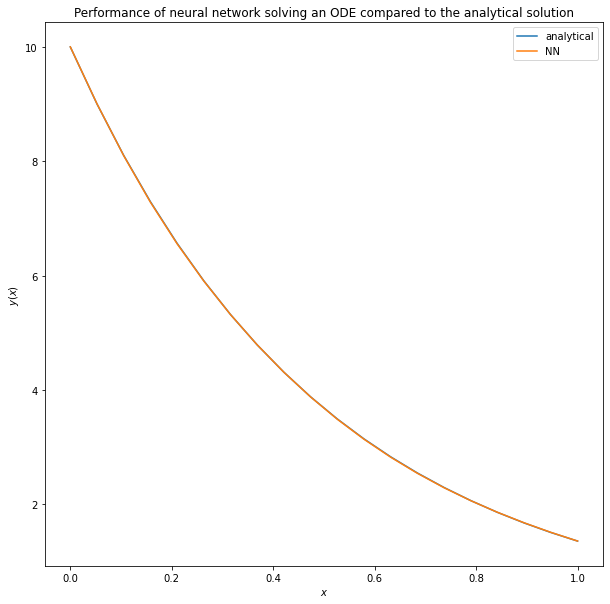

In [26]:
%matplotlib inline

import autograd.numpy as np
from autograd import grad, elementwise_grad
import autograd.numpy.random as npr
from matplotlib import pyplot as plt

def sigmoid(z):
    return 1/(1 + np.exp(-z))


# Assuming one input, hidden, and output layer
def neural_network(params, x):

    # Find the weights (including and biases) for the hidden and output layer.
    # Assume that params is a list of parameters for each layer.
    # The biases are the first element for each array in params,
    # and the weights are the remaning elements in each array in params.

    P_hidden = params[0]
    P_output = params[1]

    # Assumes input x being an one-dimensional array
    num_values = np.size(x)
    x = x.reshape(-1, num_values)

    # Assume that the input layer does nothing to the input x
    x_input = x

    
    ## Hidden layer:
    # Add a row of ones to include bias
    x_input = np.concatenate((np.ones((1,num_values)), x_input ), axis = 0)

    z_hidden = np.matmul(P_hidden, x_input)
    x_hidden = sigmoid(z_hidden)

    
    ## Output layer:
    # Include bias:
    x_hidden = np.concatenate((np.ones((1,num_values)), x_hidden ), axis = 0)

    z_output = np.matmul(P_output, x_hidden)
    x_output = z_output # No activation function

    return x_output


# The trial solution using the deep neural network:
def y_trial(x,params, y0 = 10):
    return y0 + x*neural_network(params,x)


# The right side of the ODE:
def y(x, y_trial, gamma = 2):
    return -gamma*y_trial


# The cost function:
def cost_function(P, x):

    # Evaluate the trial function with the current parameters P
    y_t = y_trial(x,P)

    # Find the derivative w.r.t x of the neural network
    #d_net_out = elementwise_grad(neural_network,1)(P,x)

    # Find the derivative w.r.t x of the trial function
    d_y_t = elementwise_grad(y_trial,0)(x,P)

    # The right side of the ODE
    func = y(x, y_t)

    err_sqr = (d_y_t - func)**2
    cost_sum = np.sum(err_sqr)

    return cost_sum / np.size(err_sqr)



# Solve the exponential decay ODE using neural network with one input, hidden, and output layer
def solve_ode_neural_network(x, num_neurons_hidden, num_iter, lmb):
    ## Set up initial weights and biases

    # For the hidden layer
    p0 = npr.randn(num_neurons_hidden, 2 )

    # For the output layer
    p1 = npr.randn(1, num_neurons_hidden + 1 ) # +1 since bias is included

    P = [p0, p1]

    print('Initial cost: %g'%cost_function(P, x))

    ## Start finding the optimal weights using gradient descent

    # Find the Python function that represents the gradient of the cost function
    # w.r.t the 0-th input argument -- that is the weights and biases in the hidden and output layer
    cost_function_grad = grad(cost_function,0)

    # Let the update be done num_iter times
    for i in range(num_iter):
        # Evaluate the gradient at the current weights and biases in P.
        # The cost_grad consist now of two arrays;
        # one for the gradient w.r.t P_hidden and
        # one for the gradient w.r.t P_output
        cost_grad =  cost_function_grad(P, x)

        P[0] = P[0] - 10*lmb * cost_grad[0]
        P[1] = P[1] - lmb * cost_grad[1]

    print('Final cost: %g'%cost_function(P, x))

    return P


def y_analytic(x, gamma = 2, y0 = 10):
    return y0*np.exp(-gamma*x)



# Solve the given problem
if __name__ == '__main__':
    # Set seed such that the weight are initialized
    # with same weights and biases for every run.
    npr.seed(413)

    ## Decide the vales of arguments to the function to solve
    N = 20
    x = np.linspace(0, 1, N)

    ## Set up the initial parameters
    num_hidden_neurons = 10
    num_iter = 20000
    lmb = 0.001

    # Use the network
    P = solve_ode_neural_network(x, num_hidden_neurons, num_iter, lmb)

    # Print the deviation from the trial solution and true solution
    res = y_trial(x,P)
    res_analytical = y_analytic(x)

    print('Max absolute difference: %g'%np.max(np.abs(res - res_analytical)))

    # Plot the results
    plt.figure(figsize=(10,10))

    plt.title('Performance of neural network solving an ODE compared to the analytical solution')
    plt.plot(x, res_analytical)
    plt.plot(x, res[0,:])
    plt.legend(['analytical','NN'])
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y(x)$')
    plt.show()

## Network with one input layer, a specified number of hidden layers and one output layer

It is also possible to extend the construction of our network into a more general one, allowing the network to contain more than one hidden layers.

The number of neurons within each hidden layer are given as a list of integers.

/Users/eduard/miniforge3/envs/ashcat/lib/python3.9/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Initial cost: 421.049
Final cost: 0.0503412


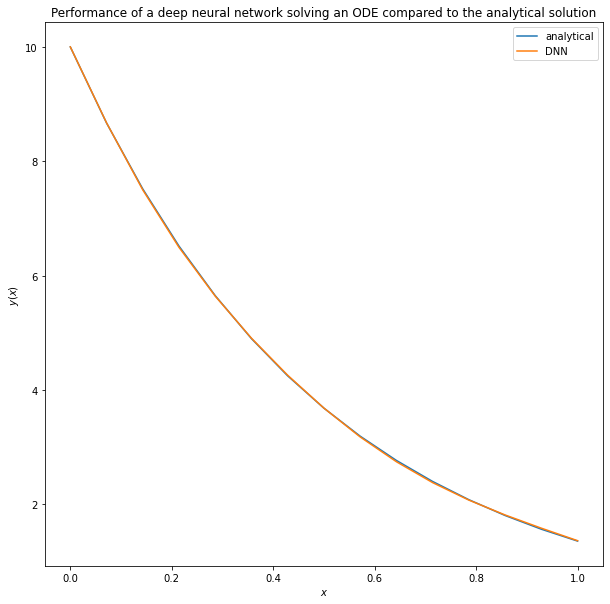

In [28]:
import autograd.numpy as np
from autograd import grad, elementwise_grad
import autograd.numpy.random as npr
from matplotlib import pyplot as plt


def sigmoid(z):
    return 1/(1 + np.exp(-z))

# The neural network with one input layer and one output layer,
# but with number of hidden layers specified by the user.
def deep_neural_network(deep_params, x):
    # N_hlayers is the number of hidden layers

    N_hlayers = np.size(deep_params) - 1 # -1 since params consists of
                                        # parameters to all the hidden
                                        # layers AND the output layer.

    # Assumes input x being an one-dimensional array
    num_values = np.size(x)
    x = x.reshape(-1, num_values)

    # Assume that the input layer does nothing to the input x
    x_input = x

    # Due to multiple hidden layers, define a variable referencing to the
    # output of the previous layer:
    x_prev = x_input

    ## Hidden layers:

    for l in range(N_hlayers):
        # From the list of parameters P; find the correct weigths and bias for this layer
        w_hidden = deep_params[l]

        # Add a row of ones to include bias
        x_prev = np.concatenate((np.ones((1,num_values)), x_prev ), axis = 0)

        z_hidden = np.matmul(w_hidden, x_prev)
        x_hidden = sigmoid(z_hidden)

        # Update x_prev such that next layer can use the output from this layer
        x_prev = x_hidden

    ## Output layer:

    # Get the weights and bias for this layer
    w_output = deep_params[-1]

    # Include bias:
    x_prev = np.concatenate((np.ones((1,num_values)), x_prev), axis = 0)

    z_output = np.matmul(w_output, x_prev)
    x_output = z_output

    return x_output

# The trial solution using the deep neural network:
def y_trial_deep(x,params, y0 = 10):
    return y0 + x*deep_neural_network(params, x)

# The right side of the ODE:
def y(x, y_trial, gamma = 2):
    return -gamma*y_trial

# The same cost function as before, but calls deep_neural_network instead.
def cost_function_deep(P, x):

    # Evaluate the trial function with the current parameters P
    y_t = y_trial_deep(x,P)

    # Find the derivative w.r.t x of the neural network
    #d_net_out = elementwise_grad(deep_neural_network,1)(P,x)

    # Find the derivative w.r.t x of the trial function
    d_y_t = elementwise_grad(y_trial_deep,0)(x,P)

    # The right side of the ODE
    func = y(x, y_t)

    err_sqr = (d_y_t - func)**2
    cost_sum = np.sum(err_sqr)

    return cost_sum / np.size(err_sqr)

# Solve the exponential decay ODE using neural network with one input and one output layer,
# but with specified number of hidden layers from the user.
def solve_ode_deep_neural_network(x, num_neurons, num_iter, lmb):
    # num_hidden_neurons is now a list of number of neurons within each hidden layer

    # The number of elements in the list num_hidden_neurons thus represents
    # the number of hidden layers.

    # Find the number of hidden layers:
    N_hidden = np.size(num_neurons)

    ## Set up initial weights and biases

    # Initialize the list of parameters:
    P = [None]*(N_hidden + 1) # + 1 to include the output layer

    P[0] = npr.randn(num_neurons[0], 2 )
    for l in range(1,N_hidden):
        P[l] = npr.randn(num_neurons[l], num_neurons[l-1] + 1) # +1 to include bias

    # For the output layer
    P[-1] = npr.randn(1, num_neurons[-1] + 1 ) # +1 since bias is included

    print('Initial cost: %g'%cost_function_deep(P, x))

    ## Start finding the optimal weights using gradient descent

    # Find the Python function that represents the gradient of the cost function
    # w.r.t the 0-th input argument -- that is the weights and biases in the hidden and output layer
    cost_function_deep_grad = grad(cost_function_deep,0)

    # Let the update be done num_iter times
    for i in range(num_iter):
        # Evaluate the gradient at the current weights and biases in P.
        # The cost_grad consist now of N_hidden + 1 arrays; the gradient w.r.t the weights and biases
        # in the hidden layers and output layers evaluated at x.
        cost_deep_grad =  cost_function_deep_grad(P, x)

        for l in range(N_hidden+1):
            P[l] = P[l] - lmb * cost_deep_grad[l]

    print('Final cost: %g'%cost_function_deep(P, x))

    return P

def y_analytic(x, gamma = 2, y0 = 10):
    return y0*np.exp(-gamma*x)

# Solve the given problem
if __name__ == '__main__':
    npr.seed(413)

    ## Decide the vales of arguments to the function to solve
    N = 15
    x = np.linspace(0, 1, N)

    ## Set up the initial parameters
    num_hidden_neurons = np.array([20,10])
    num_iter = 20000
    lmb = 0.001

    P = solve_ode_deep_neural_network(x, num_hidden_neurons, num_iter, lmb)

    res = y_trial_deep(x,P)
    res_analytical = y_analytic(x)

    plt.figure(figsize=(10,10))

    plt.title('Performance of a deep neural network solving an ODE compared to the analytical solution')
    plt.plot(x, res_analytical)
    plt.plot(x, res[0,:])
    plt.legend(['analytical','DNN'])
    plt.ylabel(r'$y(x)$')
    plt.xlabel(r'$x$')
    plt.show()